In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file = '/content/labeled_data.csv'

data = pd.read_csv(file)

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
import re

def clean_text(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r"http\S+|www\S+|https\S=", '', tweet)
  tweet = re.sub(r"\@\w+|\#", '', tweet)
  tweet = re.sub(r"\d+", '', tweet)
  tweet = re.sub(r"rt", '', tweet)
  tweet = re.sub(r"r_+", ' ', tweet)
  tweet = re.sub(r"\s+", ' ', tweet)
  tweet = re.sub(r"[^a-z\s]", '', tweet)
  tweet = re.sub(r"[^\w\s]", '', tweet)
  return tweet.strip()

data['clean_tweets'] = data['tweet'].apply(clean_text)
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweets
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about cleanin...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat hoe i...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to cry...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...


In [ ]:
data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


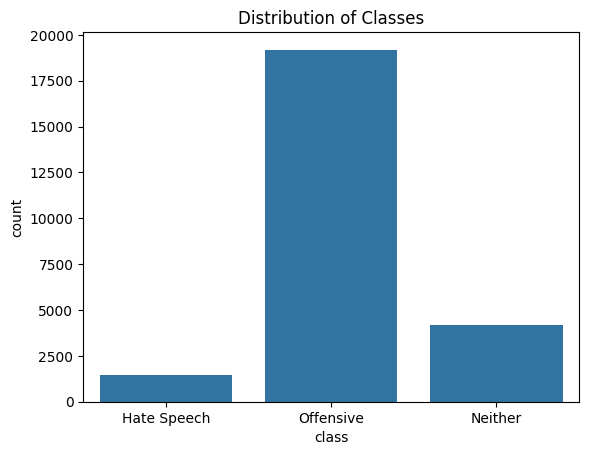

In [ ]:
sns.countplot(x='class', data=data)
plt.xticks([0,1,2], ['Hate Speech', 'Offensive', 'Neither'])
plt.title("Distribution of Classes")
plt.show()


*   Class 0 = hate speech
*   CLass 1 = offensive
*   Class 2 = neither



In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.columns.duplicated().sum()

np.int64(0)

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

data.head()

,count,hate_speech,offensive_language,neither,class,tweet,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about cleanin...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat hoe i...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to cry...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(data['clean_tweets'])
y = data['class']


In [ ]:
feature_names = vectorizer.get_feature_names_out()
print(f"Total n-gram features: {len(feature_names)}")
print("First 20 n-grams: \n", feature_names[:50])


Total n-gram features: 247049
First 20 n-grams: 
 ['aa' 'aa bfmv' 'aa bfmv fob' 'aa blink' 'aa blink tdg' 'aa classes'
 'aa classes bc' 'aa lol' 'aa miw' 'aa miw btf' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaaaaand begins fucking' 'aaahhhhh'
 'aaahhhhh internet' 'aaahhhhh internet died' 'aahahah' 'aahahah fuck'
 'aahahah fuck watches' 'aaliyah' 'aampt' 'aampt ackin' 'aampt ackin like'
 'aamu' 'aan' 'aan stok' 'aan stok heeft' 'aap' 'aap maoists'
 'aap maoists terroristscongies' 'aap rocky' 'aap shosaid'
 'aap shosaid know' 'aaron' 'aaron hernandez' 'aaron hernandez went'
 'aaron hernandezs' 'aaron hernandezs girlfriend' 'aaron weak'
 'aaron weak night' 'aaronmacgruder' 'aaronmacgruder stuff'
 'aaronmacgruder stuff blows' 'aaryn' 'aaryn bitch' 'aaryn bitch know'
 'ab' 'ab bitch' 'ab bitch amp' 'abandonado']


In [ ]:
for i in range(10):
    print(data['clean_tweets'].iloc[i])


as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
boy dats coldtyga dwn bad for cuffin dat hoe in the st place
dawg  you ever fuck a bitch and she sta to cry you be confused as shit
she look like a tranny
the shit you hear about me might be true or it might be faker than the bitch who told it to ya
the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes
i can not just sit up and hate on another bitch  i got too much shit going on
cause im tired of you big bitches coming for us skinny girls
amp you might not get ya bitch back amp thats that
hobbies include fighting mariam bitch


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk import word_tokenize, pos_tag

def tokenize_and_pos(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

data['pos_tags'] = data['clean_tweets'].apply(tokenize_and_pos)

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,count,hate_speech,offensive_language,neither,class,tweet,clean_tweets,pos_tags
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about cleanin...,"[(as, IN), (a, DT), (woman, NN), (you, PRP), (..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat hoe i...,"[(boy, NN), (dats, NNS), (coldtyga, VBP), (dwn..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to cry...,"[(dawg, NN), (you, PRP), (ever, RB), (fuck, VB..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,"[(she, PRP), (look, VBP), (like, IN), (a, DT),..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...,"[(the, DT), (shit, NN), (you, PRP), (hear, VBP..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from collections import Counter

def extract_pos_features(pos_tags):
    tag_counts = Counter(tag for word, tag in pos_tags)
    return {
        'noun_count': sum(tag_counts[t] for t in ['NN', 'NNP', 'NNS', 'NNPS']),
        'adjective_count': sum(tag_counts[t] for t in ['JJ', 'JJR', 'JJS']),
        'verb_count': sum(tag_counts[t] for t in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']),
        'adverb_count': sum(tag_counts[t] for t in ['RB', 'RBR', 'RBS']),
        'preposition_count': sum(tag_counts[t] for t in ['IN'])
    }

data = data.drop(columns=[col for col in data.columns if col in ['noun_count', 'adjective_count', 'verb_count', 'adverb_count', 'preposition_count']])
pos_features = data['pos_tags'].apply(extract_pos_features)
pos_data = pd.DataFrame(pos_features.tolist())

data = pd.concat([data, pos_data], axis=1)

data.head()



,count,hate_speech,offensive_language,neither,class,tweet,clean_tweets,pos_tags,noun_count,adjective_count,verb_count,adverb_count,preposition_count
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about cleanin...,"[(as, IN), (a, DT), (woman, NN), (you, PRP), (...",5,0,4,1,3
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat hoe i...,"[(boy, NN), (dats, NNS), (coldtyga, VBP), (dwn...",6,3,1,0,2
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to cry...,"[(dawg, NN), (you, PRP), (ever, RB), (fuck, VB...",3,0,5,1,1
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,"[(she, PRP), (look, VBP), (like, IN), (a, DT),...",1,0,1,0,1
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...,"[(the, DT), (shit, NN), (you, PRP), (hear, VBP...",2,2,5,0,2


In [ ]:
import re

def extract_tweet_features(tweet):
  features = {
      'hashtag_count': len(re.findall(r'#\w+', tweet)),
      'mention_count': len(re.findall(r'@\w+', tweet)),
      'retweet_count': 1 if tweet.lower().startswith('RT') else 0,
      'all_caps_count': sum(1 for word in tweet.split() if word.isupper() and len(word) > 1),
      'question_count': len(re.findall(r'\?', tweet)),
      'exclamation_count': len(re.findall(r'!', tweet)),
      'char_count': len(tweet),
      'word_count': len(tweet.split()),
  }
  return features

tweet_features = data['tweet'].apply(extract_tweet_features)
tweet_data = pd.DataFrame(tweet_features.tolist())

data = pd.concat([data, tweet_data], axis=1)

data.head()

,count,hate_speech,offensive_language,neither,class,tweet,clean_tweets,pos_tags,noun_count,adjective_count,...,adverb_count,preposition_count,hashtag_count,mention_count,retweet_count,all_caps_count,question_count,exclamation_count,char_count,word_count
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about cleanin...,"[(as, IN), (a, DT), (woman, NN), (you, PRP), (...",5,0,...,1,3,0,1,0,1,0,3,140,25
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat hoe i...,"[(boy, NN), (dats, NNS), (coldtyga, VBP), (dwn...",6,3,...,0,2,0,1,0,1,0,7,85,16
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to cry...,"[(dawg, NN), (you, PRP), (ever, RB), (fuck, VB...",3,0,...,1,1,0,2,0,2,1,11,120,21
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,"[(she, PRP), (look, VBP), (like, IN), (a, DT),...",1,0,...,0,1,0,2,0,1,0,9,62,9
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...,"[(the, DT), (shit, NN), (you, PRP), (hear, VBP...",2,2,...,0,2,1,1,0,1,0,13,137,26


In [ ]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

x_ngrams = X
pos_features = pos_data.values
tweet_features = data[['hashtag_count', 'mention_count', 'retweet_count', 'all_caps_count', 'question_count',
                       'exclamation_count', 'char_count', 'word_count']].values

scaler = StandardScaler()
combined_numeric = scaler.fit_transform(np.hstack((pos_features, tweet_features)))

X_final = hstack([x_ngrams, csr_matrix(combined_numeric)])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

base_model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42, max_iter=1000)
ovr_model = OneVsRestClassifier(base_model)

parameter_grid = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ovr_model, parameter_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_final, y)

best_model = grid_search.best_estimator_
print("Best C value:", grid_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: {'estimator__C': 10}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_final)
print("Accuracy Score: ", accuracy_score(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred, target_names=['Hate Speech', 'Offensive Language', 'Neither']))

Accuracy Score:  0.939071137473268
Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.90      0.46      0.61      1430
Offensive Language       0.96      0.97      0.96     19190
           Neither       0.86      0.97      0.91      4163

          accuracy                           0.94     24783
         macro avg       0.91      0.80      0.83     24783
      weighted avg       0.94      0.94      0.93     24783



In this experiment, the whole dataset is trained and tested hence the result will be 100% accurate or closer

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, stratify=y, random_state=42)



In [ ]:
grid_search = GridSearchCV(
    estimator=ovr_model,
    param_grid=parameter_grid,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best C value (training set):", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:47:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best C value (training set): {'estimator__learning_rate': 0.3, 'estimator__max_depth': 5, 'estimator__n_estimators': 200}


Accuracy Score:  0.9076240419524002
Classification Report: 

                    precision    recall  f1-score   support

       Hate Speech       0.60      0.22      0.33       143
Offensive Language       0.94      0.95      0.95      1920
           Neither       0.81      0.94      0.87       416

          accuracy                           0.91      2479
         macro avg       0.79      0.71      0.71      2479
      weighted avg       0.90      0.91      0.90      2479



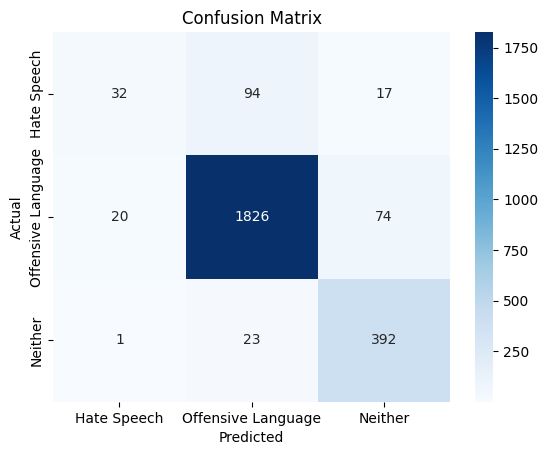

In [ ]:
y_pred = best_model.predict(X_test)
lg10h_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", lg10h_accuracy)
print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Hate Speech', 'Offensive Language', 'Neither']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate Speech', 'Offensive Language', 'Neither'], yticklabels=['Hate Speech', 'Offensive Language', 'Neither'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

in this experiment, cv=5 is done on the remaining 10% of data and best model is evaluated

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# 1. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
print("----------------------Naive Bayes---------------------")
print("Accuracy Score: ", nb_accuracy)
print("Classification Report:\n")
print(classification_report(y_test, nb_preds))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("----------------------Decision Tree---------------------")
print("Accuracy Score: ", dt_accuracy)
print("Classification Report:\n")
print(classification_report(y_test, dt_preds))

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("----------------------Random Forest---------------------")
print("Accuracy Score: ", rf_accuracy)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))

# 4. Linear SVM (One-vs-Rest)
svm = OneVsRestClassifier(LinearSVC(random_state=42))
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("----------------------Linear SVM---------------------")
print("Accuracy Score: ", svm_accuracy)
print("Linear SVM Classification Report:\n")
print(classification_report(y_test, svm_preds))


----------------------Naive Bayes---------------------
Accuracy Score:  0.8745461879790238
Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.19      0.24       143
           1       0.91      0.94      0.93      1920
           2       0.80      0.80      0.80       416

    accuracy                           0.87      2479
   macro avg       0.68      0.64      0.66      2479
weighted avg       0.86      0.87      0.87      2479

----------------------Decision Tree---------------------
Accuracy Score:  0.8898749495764421
Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.34      0.38       143
           1       0.92      0.95      0.93      1920
           2       0.85      0.82      0.83       416

    accuracy                           0.89      2479
   macro avg       0.74      0.70      0.72      2479
weighted avg       0.88      0.89      0.89      2479

------

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:12:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'estimator__learning_rate': 0.3, 'estimator__max_depth': 5, 'estimator__n_estimators': 200}
----------------------XGBoost---------------------
Accuracy Score:  0.9076240419524002
Classification Report: 

                    precision    recall  f1-score   support

       Hate Speech       0.60      0.22      0.33       143
Offensive Language       0.94      0.95      0.95      1920
           Neither       0.81      0.94      0.87       416

          accuracy                           0.91      2479
         macro avg       0.79      0.71      0.71      2479
      weighted avg       0.90      0.91      0.90      2479



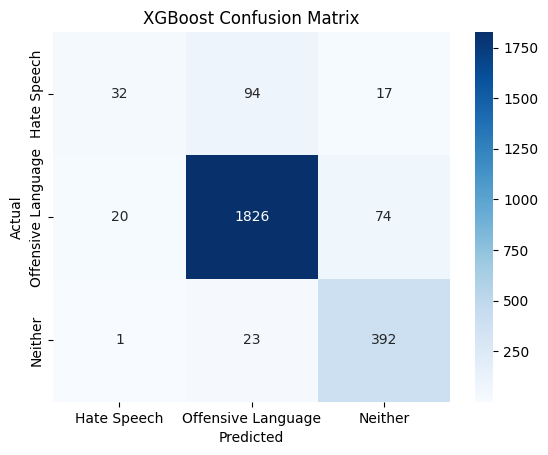

In [ ]:
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, stratify=y, random_state=42)

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

ovr_model = OneVsRestClassifier(xgb_model)

parameter_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__max_depth': [3, 5]
}

grid_search = GridSearchCV(
    estimator=ovr_model,
    param_grid=parameter_grid,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print("----------------------XGBoost---------------------")
print("Accuracy Score: ", xgb_accuracy)
print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Hate Speech', 'Offensive Language', 'Neither']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech', 'Offensive Language', 'Neither'],
            yticklabels=['Hate Speech', 'Offensive Language', 'Neither'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

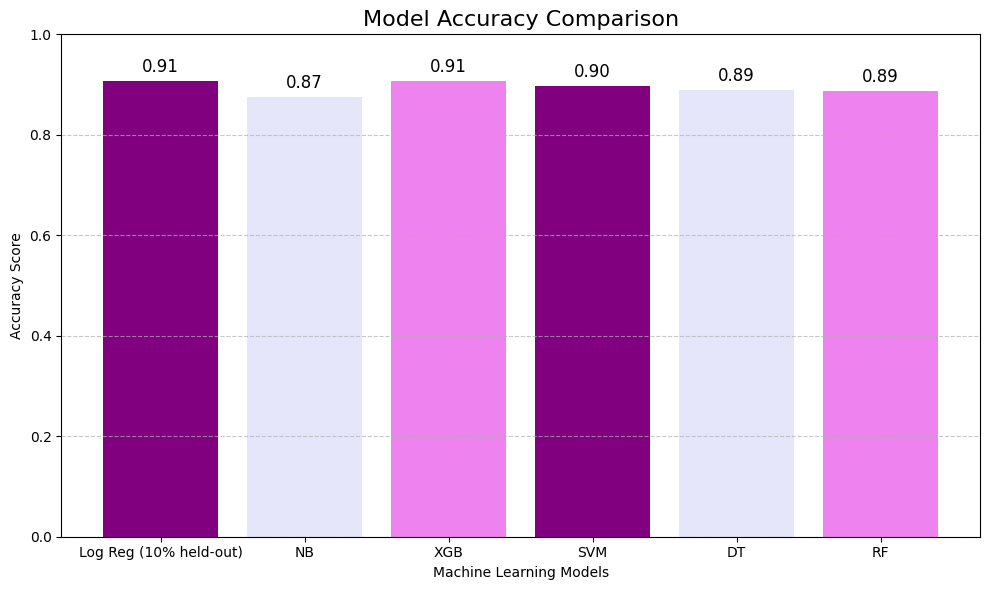

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Log Reg (10% held-out)', 'NB', 'XGB', 'SVM', 'DT', 'RF']
accuracies = [lg10h_accuracy, nb_accuracy, xgb_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]  # Use your actual accuracy scores here

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['Purple', 'lavender', 'Violet'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score')
plt.xlabel('Machine Learning Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
